In [1]:
from fastai.vision import *

In [2]:
directory = 'dataset'
path = Path(directory)

In [3]:
bs = 32
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
        ds_tfms=get_transforms(), size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

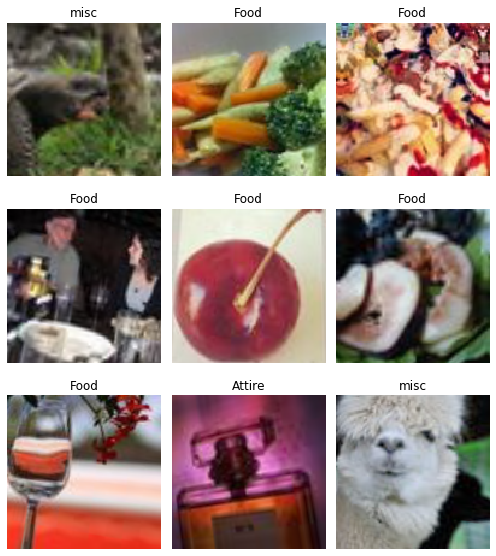

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,f_beta,time
0,1.141821,0.881509,0.742692,02:00
1,0.960210,0.700101,0.780674,01:54
2,0.666026,0.569712,0.800761,01:55
3,0.614924,0.550367,0.825906,01:55
4,0.541856,0.537226,0.822057,01:54
5,0.480111,0.499007,0.834998,01:55
6,0.447260,0.513873,0.832639,01:55
7,0.379748,0.489685,0.840453,01:52
8,0.355315,0.472151,0.845830,01:51
9,0.279393,0.494411,0.842968,01:50


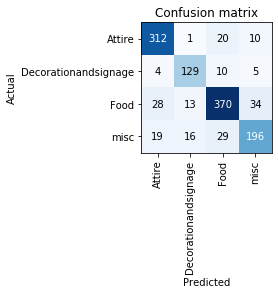

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
learn.save('resnet152-1')
learn.export()